In [2]:
import mediapipe as mp
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 

from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score, confusion_matrix, roc_curve, auc

from keras.utils.np_utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

# Drawing helpers
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

## 1. Set ups

### 1.1. Load models & scaler

In [3]:
# Load all sklearn models
# with open("./model/all_sklearn.pkl", "rb") as f:
#     sklearn_models = pickle.load(f)

DL_model = keras.models.load_model('./model/hybrid_model2.h5')

# Load all deep learning models
# with open("./model/all_dp.pkl", "rb") as f:
#     dp_models = pickle.load(f)

# Load input scaler
with open("./model/input_scaler.pkl", "rb") as f:
    sc = pickle.load(f)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



### 1.2. Important functions

In [4]:
def describe_dataset(dataset_path: str):
    '''
    Describe dataset
    '''

    data = pd.read_csv(dataset_path)
    print(f"Headers: {list(data.columns.values)}")
    print(f'Number of rows: {data.shape[0]} \nNumber of columns: {data.shape[1]}\n')
    print(f"Labels: \n{data['label'].value_counts()}\n")
    print(f"Missing values: {data.isnull().values.any()}\n")
    
    duplicate = data[data.duplicated()]
    print(f"Duplicate Rows : {len(duplicate.sum(axis=1))}")

    return data


def round_up_metric_results(results) -> list:
    '''Round up metrics results such as precision score, recall score, ...'''
    return list(map(lambda el: round(el, 3), results))

## 2. Process Test set

In [5]:
# load dataset
test_df = describe_dataset("./test.csv")

# Categorizing label
test_df.loc[test_df["label"] == "C", "label"] = 0
test_df.loc[test_df["label"] == "L", "label"] = 1

# Standard Scaling of features
test_x = test_df.drop("label", axis = 1)
test_x = pd.DataFrame(sc.transform(test_x))

test_y = test_df["label"].astype('int')

# # Converting prediction to categorical
test_y_cat = to_categorical(test_y)

Headers: ['label', 'nose_x', 'nose_y', 'nose_z', 'nose_v', 'left_shoulder_x', 'left_shoulder_y', 'left_shoulder_z', 'left_shoulder_v', 'right_shoulder_x', 'right_shoulder_y', 'right_shoulder_z', 'right_shoulder_v', 'right_elbow_x', 'right_elbow_y', 'right_elbow_z', 'right_elbow_v', 'left_elbow_x', 'left_elbow_y', 'left_elbow_z', 'left_elbow_v', 'right_wrist_x', 'right_wrist_y', 'right_wrist_z', 'right_wrist_v', 'left_wrist_x', 'left_wrist_y', 'left_wrist_z', 'left_wrist_v', 'left_hip_x', 'left_hip_y', 'left_hip_z', 'left_hip_v', 'right_hip_x', 'right_hip_y', 'right_hip_z', 'right_hip_v']
Number of rows: 604 
Number of columns: 37

Labels: 
label
C    339
L    265
Name: count, dtype: int64

Missing values: False

Duplicate Rows : 0


## 2. Test set evaluation for all models

### 2.1. Sklearn models evaluation

In [6]:
# testset_final_results = []

# for name, model in sklearn_models.items():
#     # Evaluate model
#     model_results = model.predict(test_x)

#     p_score = precision_score(test_y, model_results, average="macro")
#     a_score = accuracy_score(test_y, model_results)
#     r_score = recall_score(test_y, model_results, average="macro")
#     f1_score_result = f1_score(test_y, model_results, average="macro")
#     cm = confusion_matrix(test_y, model_results, labels=[0, 1])
#     testset_final_results.append(( name,  p_score, r_score, a_score, f1_score_result, cm ))


# sklearn_eval = pd.DataFrame(testset_final_results, columns=["Model", "Precision Score", "Recall Score", "Accuracy Score", "F1 Score", "Confusion Matrix"])

# sklearn_eval

### 2.2. Deep learning models

In [7]:
# test_set_results = []

# for name, model in dp_models.items():
#     # Evaluate model
#     predict_x = model.predict(test_x, verbose=False) 
#     y_pred_class = np.argmax(predict_x, axis=1)
#     y_test_class = np.argmax(test_y_cat, axis=1)

#     cm = confusion_matrix(y_test_class, y_pred_class, labels=[0, 1])
#     p_score = precision_score(y_test_class, y_pred_class, average="macro")
#     a_score = accuracy_score(y_test_class, y_pred_class)
#     r_score = recall_score(y_test_class, y_pred_class, average="macro")
#     f1_score_result = f1_score(y_test_class, y_pred_class, average="macro")
    
#     test_set_results.append(( name,  (p_score), r_score, (a_score), (f1_score_result), cm ))

# dp_eval = pd.DataFrame(test_set_results, columns=["Model", "Precision Score", "Recall Score", "Accuracy Score", "F1 Score", "Confusion Matrix"])

# dp_eval

### DL model test

In [8]:


# Evaluate model
predict_x = DL_model.predict(test_x, verbose=False) 
y_pred_class = np.argmax(predict_x, axis=1)
y_test_class = np.argmax(test_y_cat, axis=1)

cm = confusion_matrix(y_test_class, y_pred_class, labels=[0, 1])
p_score = precision_score(y_test_class, y_pred_class, average="macro")
a_score = accuracy_score(y_test_class, y_pred_class)
r_score = recall_score(y_test_class, y_pred_class, average="macro")
f1_score_result = f1_score(y_test_class, y_pred_class, average="macro")

print("p_score", p_score)
print("a_score", a_score)
print("r_score", r_score)
print("f1_score", f1_score_result)

2023-05-10 02:11:50.361719: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


p_score 0.8846824686940966
a_score 0.8857615894039735
r_score 0.8829910391272889
f1_score 0.8837732691905459


<Axes: >

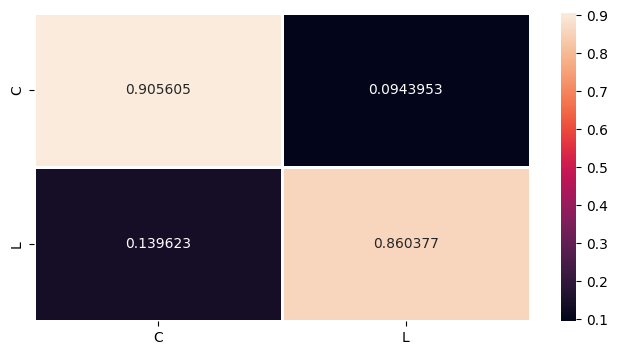

In [9]:
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(8,4)) 
cm_array_df = pd.DataFrame(cm_norm, index=["C", "L"], columns=["C", "L"])
sns.heatmap(cm_array_df, linewidths=1, annot=True, ax=ax, fmt='g')



### 2.3. Final Results

In [10]:
# eval_df = pd.concat([sklearn_eval, dp_eval])
# eval_df = eval_df.sort_values(by=['F1 Score'], ascending=False).reset_index(drop=True)
# eval_df.to_csv(f"evaluation.csv", sep=',', encoding='utf-8', index=False)
# eval_df

## 3. DL_model - ROC - Confusion Matrix

DL_model

In [11]:
# best_model = sklearn_models["KNN"]
# y_predictions = DL_model.predict(test_x)
# print(y_predictions)
# # p_score = precision_score(test_y, y_predictions, labels=[0, 1], average=None)
# # r_score = recall_score(test_y, y_predictions, labels=[0, 1], average=None)
# # f1_score_result = f1_score(test_y, y_predictions, labels=[0, 1], average=None)

# # p_score, r_score, f1_score_result
# y_pred = y_predictions.argmax(axis=-1)


In [12]:
# (0.975 + 0.967) / 2

### 3.1. Confusion Matrix

In [13]:
# KNN_cm = eval_df[ eval_df["Model"] == 'KNN' ]["Confusion Matrix"].values[0]

# cm_array_df = pd.DataFrame(KNN_cm, index=["C", "L"], columns=["C", "L"])

# fig, ax = plt.subplots(figsize=(8,4)) 
# sns.heatmap(cm_array_df, linewidths=1, annot=True, ax=ax, fmt='g')

### 3.3. F1 Score and Confidence correlation

In [14]:
def to_labels(y_pred, y_pred_proba, threshold):
    '''Return prediction taking confidence threshold into account'''
    results = []

    for index, predicted_class in enumerate(y_pred):
        prediction_probabilities = y_pred_proba[index]
        class_prediction_probability = round(prediction_probabilities[np.argmax(prediction_probabilities)], 2)

        results.append(predicted_class if class_prediction_probability >= threshold else -1)
    
    return results

# def to_labels(y_pred, y_pred_proba, threshold):
#     '''Return prediction taking confidence threshold into account'''
#     results = []

#     for index, predicted_class in enumerate(y_pred):
#         prediction_probabilities = y_pred_proba[index]
#         class_prediction_probability = round(prediction_probabilities[np.argmax(prediction_probabilities)], 2)

#         if class_prediction_probability >= threshold:
#             results.append(predicted_class)
#         else:
#             results.append(0)
    
#     return results



def calculate_correlation_score_confidence(test_x, test_y):
    '''Calculate correlation between Precision score/Recall score/F1 score and confidence threshold'''
    y_predictions = DL_model.predict(test_x)
    y_predict_proba = y_predictions

    thresholds = list(np.arange(0, 1.01, 0.01))

    f1_score_results = []

    for threshold in thresholds:
        true_predictions = to_labels(y_predictions, y_predict_proba, threshold)
        f1_s = list(f1_score(test_y, true_predictions, labels=[0, 1], average=None))
        all_class_f1 = f1_score(test_y, true_predictions, labels=[0, 1, 2], average="weighted")
        f1_s.append(all_class_f1)
        f1_score_results.append(f1_s)
    
    return thresholds, f1_score_results


In [15]:
# thresholds, f1_scores = calculate_correlation_score_confidence(test_x, test_y)

# first_class = [ el[0] for el in f1_scores ]
# second_class = [ el[1] for el in f1_scores ]
# all_classes = [ el[2] for el in f1_scores ]

# fig, ax = plt.subplots(figsize=(8,6))
# plt.plot(thresholds, first_class, label = "F1 Score - Correct class")
# plt.plot(thresholds, second_class, label = "F1 Score - Incorrect class")
# plt.plot(thresholds, all_classes, label = "F1 Score - All classes", linewidth=2.0, color="blue")
# plt.legend(loc = 'lower left')
# plt.ylim([0.8, 1])
# plt.xlim([0.025, 1])
# plt.xlabel("Threshold", fontsize = 12)
# plt.ylabel("Score", fontsize = 12)
# # plt.axvline(thresholds[np.argmin(abs(precision-recall))], color="k", ls = "--")
# # plt.title(label = F"Threshold = {thresholds[np.argmin(abs(precision-recall))]:.3f}", fontsize = 12)
# plt.show()

### 3.2. ROC curve

19/19 [==============================] - 0s 5ms/step
Optimal Threshold: 0.9154422879219055


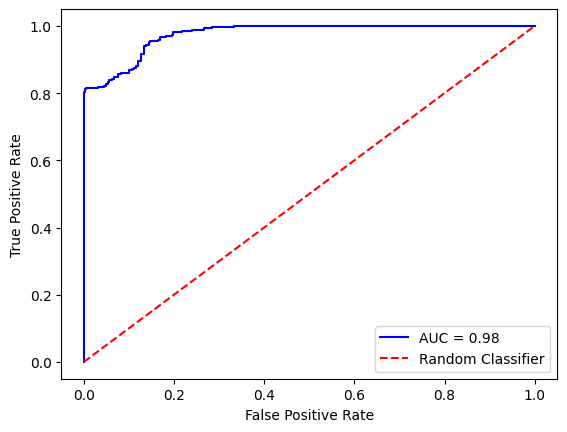

In [16]:
# calculate the fpr and tpr for all thresholds of the classification
probs = DL_model.predict(test_x)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(test_y, preds)
roc_auc = auc(fpr, tpr)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = threshold[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")

# method I: plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--', label="Random Classifier")
plt.legend(loc=4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()